In [1]:
import pandas as pd
from os import listdir, getcwd
from os.path import isfile, join
pd.set_option('display.max_columns', 500)

In [2]:
# get filenames
data_filenames = [ file for file in listdir('data') if isfile(join(getcwd(), 'data', file))]

In [3]:
def load_data():
    """
    Load all files, return single dataframe
    """
    data_array = [] # placeholder for dataframes
    for filename in data_filenames:
        full_path = join(getcwd(), 'data', filename)
        print("Loading: " + filename)
        data_array.append(pd.read_csv(full_path))
    
    return(pd.concat(data_array, ignore_index = True))

In [4]:
raw = load_data()
# create boolean variable for charged off loan status
raw['charged_off'] = raw['loan_status'] == 'Charged Off' 

Loading: 2016Q1.csv.gz
Loading: 2016Q2.csv.gz
Loading: 2017Q1.csv.gz
Loading: 2017Q4.csv.gz
Loading: 2017Q2.csv.gz
Loading: 2017Q3.csv.gz
Loading: 2016Q3.csv.gz
Loading: 2016Q4.csv.gz


In [5]:
raw.shape

(438991, 56)

In [6]:
raw.sample(3)

,id,funded_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,application_type,annual_inc_joint,dti_joint,open_act_il,open_il_24m,il_util,open_rv_24m,all_util,total_rev_hi_lim,inq_last_12m,acc_open_past_24mths,bc_open_to_buy,bc_util,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,total_bal_ex_mort,total_bc_limit,revol_bal_joint,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,charged_off
12266,72563875,35000,36 months,14.46%,1204.06,Asst Sales Manager,5 years,RENT,135000.0,Fully Paid,debt_consolidation,752xx,TX,7.99,0,Mar-07,704,0.0,NaN,4,15476,80%,5,Individual,NaN,NaN,1.0,0.0,58.0,1.0,80.0,19300,1.0,1,6433.0,80.0,0,7.0,NaN,NaN,0,3,2,4,0,1,100.0,66.7,0,31580,19300,NaN,NaN,NaN,NaN,False
44310,69361348,4800,36 months,11.99%,159.41,Contract Specialist,6 years,MORTGAGE,84000.0,Current,debt_consolidation,303xx,GA,18.34,2,Sep-93,699,0.0,17.0,13,23489,62.30%,22,Individual,NaN,NaN,1.0,1.0,88.0,3.0,69.0,37700,1.0,4,661.0,95.3,3,23.0,NaN,21.0,0,15,8,13,0,1,90.9,80.0,0,35808,14200,NaN,NaN,NaN,NaN,False
1102,68497058,14400,60 months,14.85%,341.45,OCC Rep,4 years,RENT,35500.0,Charged Off,credit_card,286xx,NC,25.59,0,Aug-06,699,1.0,NaN,27,5786,32.90%,34,Individual,NaN,NaN,18.0,5.0,101.0,7.0,91.0,17600,3.0,12,6021.0,31.6,0,6.0,NaN,NaN,0,12,6,27,0,5,100.0,33.3,0,113400,8800,NaN,NaN,NaN,NaN,True


In [7]:
raw.isna().sum()

id                                     0
funded_amnt                            0
term                                   0
int_rate                               0
installment                            0
emp_title                          30367
emp_length                         30013
home_ownership                         0
annual_inc                             0
loan_status                            0
purpose                                0
zip_code                               0
addr_state                             0
dti                                  285
delinq_2yrs                            0
earliest_cr_line                       0
fico_range_high                        0
inq_last_6mths                         0
mths_since_last_delinq            213676
open_acc                               0
revol_bal                              0
revol_util                           359
total_acc                              0
application_type                       0
annual_inc_joint

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438991 entries, 0 to 438990
Data columns (total 56 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              438991 non-null  int64  
 1   funded_amnt                     438991 non-null  int64  
 2   term                            438991 non-null  object 
 3   int_rate                        438991 non-null  object 
 4   installment                     438991 non-null  float64
 5   emp_title                       408624 non-null  object 
 6   emp_length                      408978 non-null  object 
 7   home_ownership                  438991 non-null  object 
 8   annual_inc                      438991 non-null  float64
 9   loan_status                     438991 non-null  object 
 10  purpose                         438991 non-null  object 
 11  zip_code                        438991 non-null  object 
 12  addr_state      

In [9]:
raw['id'].drop_duplicates().shape

(438991,)

In [10]:
raw.shape

(438991, 56)

In [11]:
raw['loan_status'].value_counts(dropna = False)

Current               251552
Fully Paid            132055
Charged Off            40902
Late (31-120 days)      8209
In Grace Period         4016
Late (16-30 days)       2257
Name: loan_status, dtype: int64

In [12]:
raw['purpose'].value_counts()[:15]

debt_consolidation    246935
credit_card            91374
home_improvement       32995
other                  30875
major_purchase         10685
medical                 6248
car                     5062
small_business          4930
vacation                3585
moving                  3480
house                   2525
renewable_energy         295
educational                1
wedding                    1
Name: purpose, dtype: int64

## Build Model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np
from yellowbrick.regressor import residuals_plot, prediction_error
from yellowbrick.classifier import DiscriminationThreshold, ClassificationReport
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn import set_config
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import roc_auc_score
set_config(display="diagram")
from time import time

def class_report(model, test = True):
    """
    Use yellowbrick to get a classifiation report on
    a model for the test datset
    """
    visualizer = ClassificationReport(model)
    if test:
        visualizer.fit(X_test, y_test)
        visualizer.score(X_test, y_test)
    else:
        visualizer.fit(X_train, y_train)
        visualizer.score(X_train, y_train)
    visualizer.show()

def print_time_elapsed(t0):
    """
    Print time elapsed in seconds since time t0
    """
    print("%.1f seconds elapsed" % (time() - t0))

In [ ]:
# predictors from the original dataset to include
selected_X_columns = ['annual_inc', 'purpose', 'home_ownership', 'dti', 'delinq_2yrs']
X_orig = raw[selected_X_columns]

In [31]:
# transform categorical and numerical columns
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X_orig)
categorical_columns = categorical_columns_selector(X_orig)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
#numerical_preprocessor = StandardScaler()

numeric_transformer = Pipeline([("imputer", 
    SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numeric_transformer, numerical_columns)])

# create model pipelines
lr_model = LogisticRegression(solver='liblinear')

rf_model = RandomForestClassifier(n_jobs = -1, n_estimators=25)

In [32]:
# perform preprocessing on predictors
X = preprocessor.fit_transform(
    X_orig
    )

#y = np.log10(study_df[['total_gmv']].values.ravel())
y = raw[['charged_off']].values.ravel()
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [41]:
# Apply SMOTE to get balanced classes
t0 = time()
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print_time_elapsed(t0)

114.1 seconds elapsed


In [25]:
np.mean(y_res) # check class imbalance

0.5

In [36]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, # predictors
    y_res, # outcome variable
    test_size = 0.50, 
    random_state = 42
)

## Train Models

In [39]:
t0 = time()
# train models
lr_model.fit(X_train, y_train)
print_time_elapsed(t0)

2.7 seconds elapsed


In [43]:
t0 = time()
rf_model.fit(X_train, y_train)
print_time_elapsed(t0)

284.5 seconds elapsed


## Evaluate Models

In [61]:
def print_roc(model, test = True):
    """
    Print ROC metric for an input the model
    """
    if test:
        roc = roc_auc_score(y_test, model.predict(X_test))
    else:
        roc = roc_auc_score(y_train, model.predict(X_train))
    print(roc)

In [59]:
print_roc(rf_model)

0.7614019703237981


In [62]:
print_roc(rf_model, test = False)

0.9917229377885389


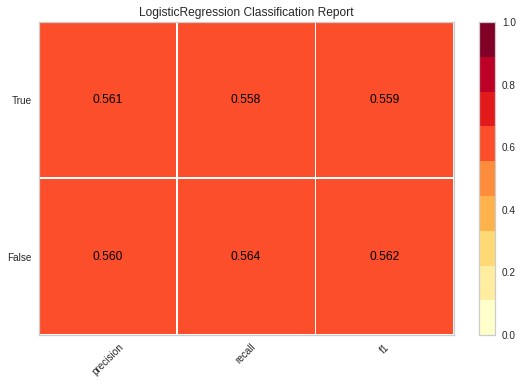

In [42]:
class_report(lr_model)

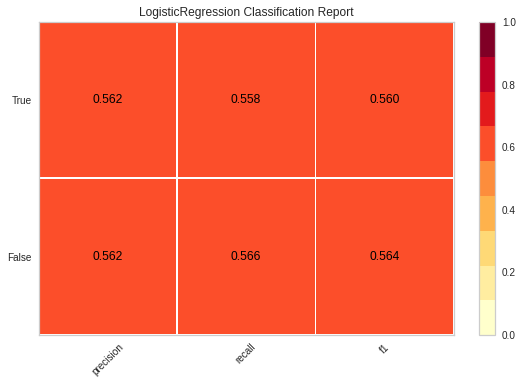

In [49]:
# Look at training set performance
class_report(lr_model, test = False)

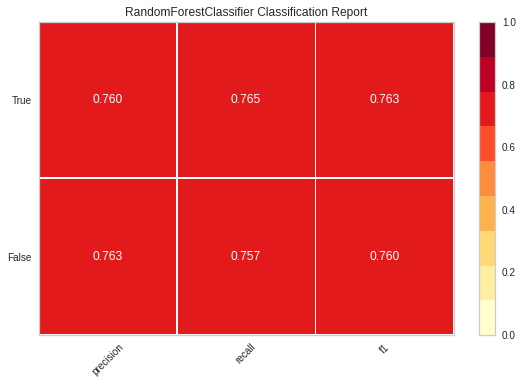

In [44]:
class_report(rf_model)

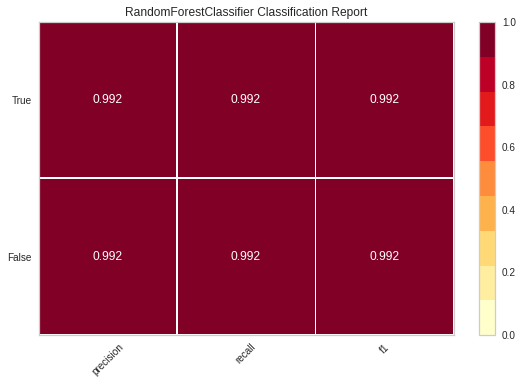

In [48]:
# Look at training set performance
class_report(rf_model, test = False)

In [42]:
rf_model.feature_importances_

array([4.82847824e-04, 9.35193489e-04, 1.09998864e-03, 9.03010961e-04,
       4.58804836e-04, 7.86805499e-04, 7.09782713e-04, 5.89510787e-04,
       1.01261268e-03, 3.08995142e-04, 9.19274279e-04, 5.05764921e-04,
       6.28023534e-05, 1.36075113e-03, 1.97532397e-07, 4.94411165e-04,
       1.44603601e-03, 3.23164623e-01, 6.48016052e-01, 1.67425353e-02])

In [ ]:
rf_model.get_features()